# Pima Indians Diabets Database
### A Complete ML Pipeline tutorial

- 참고자료 : https://www.kaggle.com/pouryaayria/a-complete-ml-pipeline-tutorial-acu-86

<div style="text-align: right"> Initial upload: 2020.11.15 </div>
<div style="text-align: right"> Last update: 2020.11.15</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

# Options for pandas
pd.options.display.max_columns = 50

In [2]:
import seaborn as sns
from IPython.display import display

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

In [3]:
import os
print(os.listdir())

['.ipynb_checkpoints', '1. A Complete ML Pipeline tutorial.ipynb', 'diabetes.csv']


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**컬럼 정보**  
1. Number of times pregnant

2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test

3. Diastolic blood pressure (mm Hg)

4. Triceps skin fold thickness (mm)

5. 2-Hour serum insulin (mu U/ml)

6. Body mass index (weight in kg/(height in m)^2)

7. Diabetes pedigree function

8. Age (years)

9. Class variable (0 or 1)

In [4]:
SEED = 7  
np.random.seed(SEED)

In [5]:
df = pd.read_csv('diabetes.csv')
df_name = df.columns

In [6]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [7]:
df.shape

(768, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

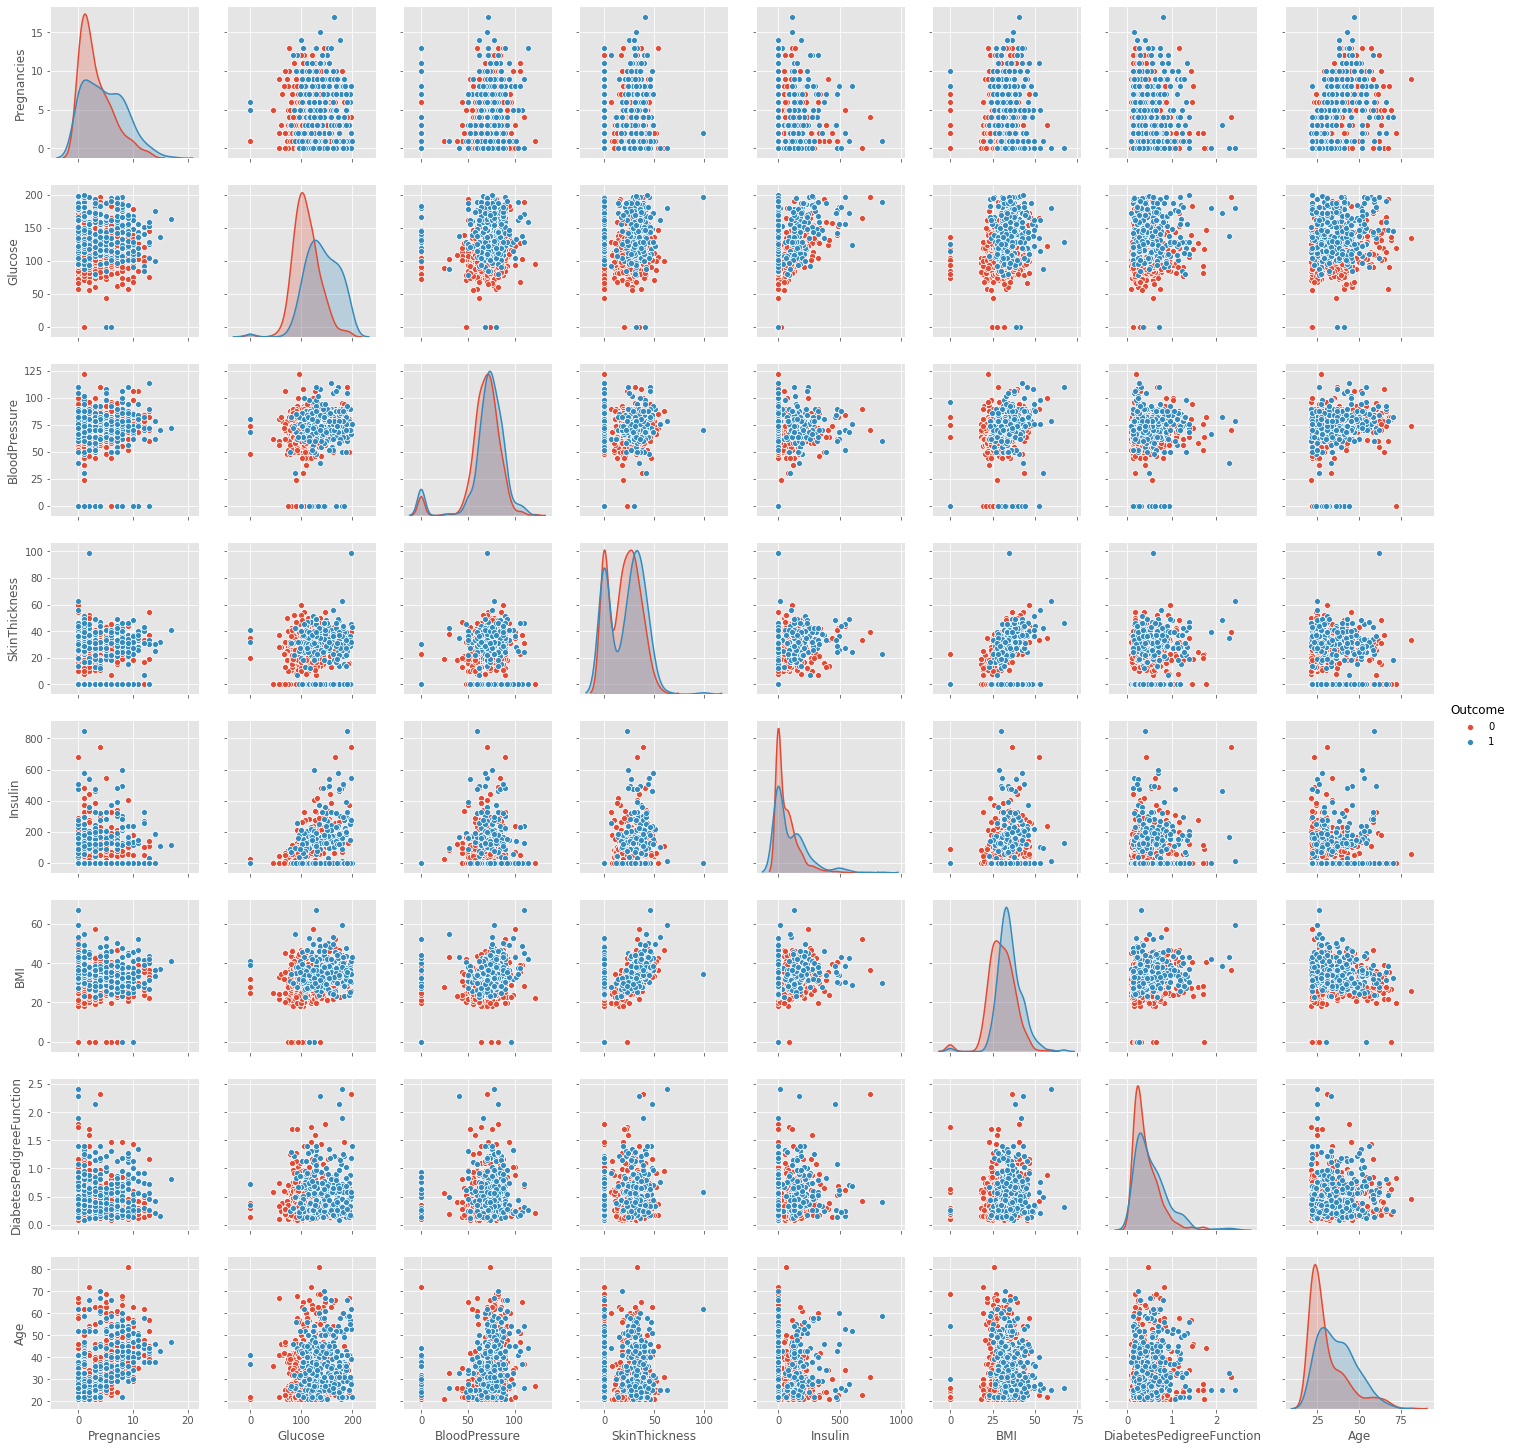

In [10]:
g = sns.pairplot(df, hue = 'Outcome')

- outlier가 많아보임??

Text(0.5, 1.0, 'The distribution of Pregnancies')

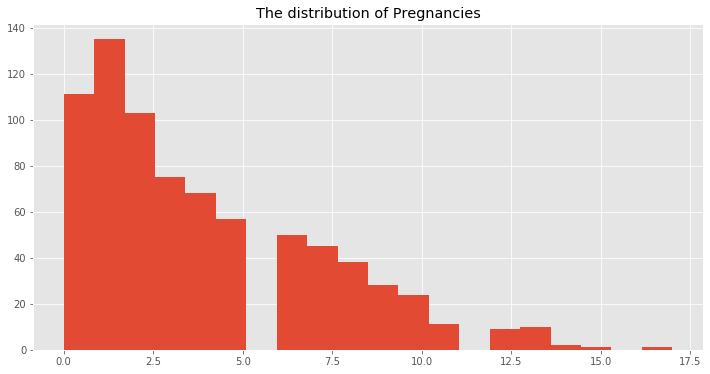

In [11]:
fig, ax = plt.subplots(figsize = (12, 6))
df['Pregnancies'].hist(bins = 20, ax = ax)
plt.title('The distribution of Pregnancies')

- 임신 17회는 이상해 보인다.

타겟(Outcome)에 대하여 분포를 더 살펴보자

**Skewness** is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

**Kurtosis** is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case

In [12]:
from scipy.stats import skew
from scipy.stats import kurtosis
def plotBarCat(df,feature,target):
    
    
    
    x0 = df[df[target]==0][feature]
    x1 = df[df[target]==1][feature]

    trace1 = go.Histogram(
        x=x0,
        opacity=0.75
    )
    trace2 = go.Histogram(
        x=x1,
        opacity=0.75
    )

    data = [trace1, trace2]
    layout = go.Layout(barmode='overlay',
                      title=feature,
                       yaxis=dict(title='Count'
        ))
    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename='overlaid histogram')
    
    def DescribeFloatSkewKurt(df,target):
        """
            A fundamental task in many statistical analyses is to characterize
            the location and variability of a data set. A further
            characterization of the data includes skewness and kurtosis.
            Skewness is a measure of symmetry, or more precisely, the lack
            of symmetry. A distribution, or data set, is symmetric if it
            looks the same to the left and right of the center point.
            Kurtosis is a measure of whether the data are heavy-tailed
            or light-tailed relative to a normal distribution. That is,
            data sets with high kurtosis tend to have heavy tails, or
            outliers. Data sets with low kurtosis tend to have light
            tails, or lack of outliers. A uniform distribution would
            be the extreme case
        """
        print('-*-'*25)
        print("{0} mean : ".format(target), np.mean(df[target]))
        print("{0} var  : ".format(target), np.var(df[target]))
        print("{0} skew : ".format(target), skew(df[target]))
        print("{0} kurt : ".format(target), kurtosis(df[target]))
        print('-*-'*25)
    
    DescribeFloatSkewKurt(df,target)

In [13]:
plotBarCat(df, df_name[0], 'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055383
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [14]:
plotBarCat(df,df_name[1],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055383
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [15]:
plotBarCat(df,df_name[2],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055383
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [16]:
plotBarCat(df,df_name[3],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055383
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [17]:
plotBarCat(df,df_name[4],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055383
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [18]:
plotBarCat(df,df_name[5],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055383
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [19]:
plotBarCat(df,df_name[6],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055383
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [20]:
plotBarCat(df,df_name[7],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055383
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [21]:
plotBarCat(df,df_name[8],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055383
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [22]:
def PlotPie(df, nameOfFeature):
    labels = [str(df[nameOfFeature].unique()[i]) for i in range(df[nameOfFeature].nunique())]
    values = [df[nameOfFeature].value_counts()[i] for i in range(df[nameOfFeature].nunique())]

    trace=go.Pie(labels=labels,values=values)

    py.iplot([trace])

In [23]:
PlotPie(df, 'Outcome')

### 2.3.1 Outliers investigation

In [24]:
def OutLiersBox(df,nameOfFeature):
    
    trace0 = go.Box(
        y = df[nameOfFeature],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all',
        marker = dict(
            color = 'rgb(7,40,89)'),
        line = dict(
            color = 'rgb(7,40,89)')
    )

    trace1 = go.Box(
        y = df[nameOfFeature],
        name = "Only Whiskers",
        boxpoints = False,
        marker = dict(
            color = 'rgb(9,56,125)'),
        line = dict(
            color = 'rgb(9,56,125)')
    )

    trace2 = go.Box(
        y = df[nameOfFeature],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers',
        marker = dict(
            color = 'rgb(8,81,156)',
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            line = dict(
                outliercolor = 'rgba(219, 64, 82, 0.6)',
                outlierwidth = 2)),
        line = dict(
            color = 'rgb(8,81,156)')
    )

    trace3 = go.Box(
        y = df[nameOfFeature],
        name = "Whiskers and Outliers",
        boxpoints = 'outliers',
        marker = dict(
            color = 'rgb(107,174,214)'),
        line = dict(
            color = 'rgb(107,174,214)')
    )

    data = [trace0,trace1,trace2,trace3]

    layout = go.Layout(
        title = "{} Outliers".format(nameOfFeature)
    )

    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig, filename = "Outliers")

In [25]:
OutLiersBox(df, df_name[0])

In [26]:
OutLiersBox(df,df_name[1])

In [27]:
OutLiersBox(df,df_name[2])

In [28]:
OutLiersBox(df,df_name[3])

In [29]:
OutLiersBox(df,df_name[4])

In [30]:
OutLiersBox(df,df_name[5])

In [31]:
OutLiersBox(df,df_name[6])

In [32]:
OutLiersBox(df,df_name[7])

In [33]:
OutLiersBox(df,df_name[8])

### 2.3.2 Outliers investigation Pairs

In [34]:
from scipy import stats
import matplotlib.font_manager

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [35]:
def OutLierDetection(df,feature1,feature2,outliers_fraction=.1):
    
    new_df = df.copy()
    rng = np.random.RandomState(42)

    # Example settings
    n_samples = new_df.shape[0]
#     outliers_fraction = 0.2 # ************************************** imp
    clusters_separation = [0]#, 1, 2]

    # define two outlier detection tools to be compared
    classifiers = {
        "One-Class SVM": svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05,
                                         kernel="rbf", gamma=0.1),
        "Robust covariance": EllipticEnvelope(contamination=outliers_fraction),
        "Isolation Forest": IsolationForest(max_samples=n_samples,
                                            contamination=outliers_fraction,
                                            random_state=rng),
        "Local Outlier Factor": LocalOutlierFactor(
            n_neighbors=35,
            contamination=outliers_fraction)}

    
    xx, yy = np.meshgrid(np.linspace(new_df[feature1].min()-new_df[feature1].min()*10/100, 
                                     new_df[feature1].max()+new_df[feature1].max()*10/100, 50),
                         np.linspace(new_df[feature2].min()-new_df[feature2].min()*10/100,
                                     new_df[feature2].max()+new_df[feature2].max()*10/100, 50))


    n_inliers = int((1. - outliers_fraction) * n_samples)
    n_outliers = int(outliers_fraction * n_samples)
    ground_truth = np.ones(n_samples, dtype=int)
    ground_truth[-n_outliers:] = -1

    # Fit the problem with varying cluster separation
    for i, offset in enumerate(clusters_separation):
        np.random.seed(42)
        # Data generation

        X = new_df[[feature1,feature2]].values.tolist()

        # Fit the model
        plt.figure(figsize=(9, 7))
        for i, (clf_name, clf) in enumerate(classifiers.items()):
            # fit the data and tag outliers
            if clf_name == "Local Outlier Factor":
                y_pred = clf.fit_predict(X)
                scores_pred = clf.negative_outlier_factor_
            else:
                clf.fit(X)
                scores_pred = clf.decision_function(X)
                y_pred = clf.predict(X)
            threshold = stats.scoreatpercentile(scores_pred,
                                                100 * outliers_fraction)
            n_errors = (y_pred != ground_truth).sum()
            
            unique, counts = np.unique(y_pred,return_counts=True)
            print(clf_name,dict(zip(unique, counts)))
            
            new_df[feature1+'_'+feature2+clf_name] = y_pred
#             print(clf_name,y_pred) 
            # plot the levels lines and the points
            if clf_name == "Local Outlier Factor":
                # decision_function is private for LOF
                Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            subplot = plt.subplot(2, 2, i + 1)
            subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                             cmap=plt.cm.Blues_r)
            a = subplot.contour(xx, yy, Z, levels=[threshold],
                                linewidths=2, colors='red')
            subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                             colors='orange')
            b = plt.scatter(new_df[feature1], new_df[feature2], c='white',
                     s=20, edgecolor='k')

            subplot.axis('tight')

            subplot.set_xlabel("%s" % (feature1))
 
            plt.ylabel(feature2)#, fontsize=18)
            plt.title("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))

        plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
#         plt.suptitle("Outlier detection")

    plt.show()
    return new_df

One-Class SVM {-1: 197, 1: 571}
Robust covariance {-1: 77, 1: 691}
Isolation Forest {-1: 77, 1: 691}
Local Outlier Factor {-1: 76, 1: 692}


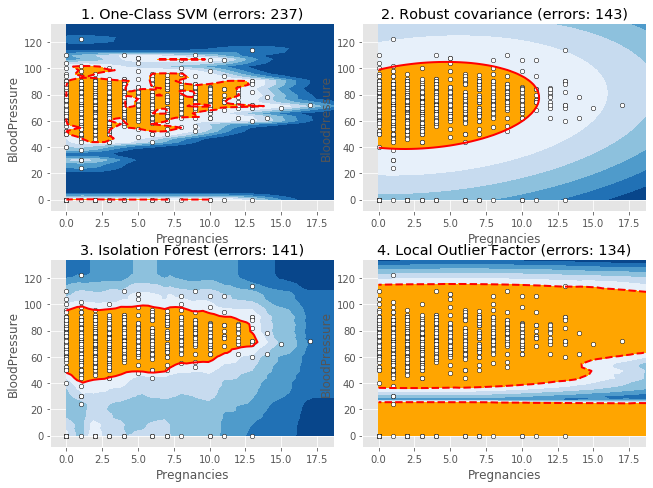

In [36]:
tt = OutLierDetection(df,'Pregnancies','BloodPressure',.1)

## 3.1 Evaluate Algorithms : Baseline

In [37]:
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [38]:
X= df[df_name[0:8]]
y = df[df_name[8]]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                   random_state = 0, 
                                                   stratify = y)

In [40]:
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))

    
    return basedModels

In [41]:
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [42]:
class PlotBoxR(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

In [43]:
models = GetBasedModel()

In [44]:
names, results = BasedLine2(X_train, y_train, models)

LR: 0.767028 (0.040972)
LDA: 0.765415 (0.039621)
KNN: 0.690587 (0.059032)
CART: 0.687282 (0.057035)
NB: 0.750767 (0.051199)
SVM: 0.747567 (0.042221)
AB: 0.736251 (0.043477)
GBM: 0.767081 (0.038063)
RF: 0.739371 (0.045193)
ET: 0.737758 (0.056218)


In [45]:
names

['LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM', 'AB', 'GBM', 'RF', 'ET']

In [46]:
results

[array([0.75806452, 0.80645161, 0.72580645, 0.82258065, 0.70491803,
        0.75409836, 0.81967213, 0.75409836, 0.80327869, 0.72131148]),
 array([0.74193548, 0.80645161, 0.72580645, 0.82258065, 0.70491803,
        0.7704918 , 0.80327869, 0.72131148, 0.80327869, 0.75409836]),
 array([0.69354839, 0.67741935, 0.61290323, 0.75806452, 0.57377049,
        0.68852459, 0.78688525, 0.68852459, 0.72131148, 0.70491803]),
 array([0.72580645, 0.70967742, 0.62903226, 0.69354839, 0.60655738,
        0.73770492, 0.80327869, 0.67213115, 0.62295082, 0.67213115]),
 array([0.69354839, 0.82258065, 0.72580645, 0.79032258, 0.67213115,
        0.78688525, 0.81967213, 0.72131148, 0.7704918 , 0.70491803]),
 array([0.75806452, 0.77419355, 0.64516129, 0.80645161, 0.72131148,
        0.75409836, 0.75409836, 0.72131148, 0.78688525, 0.75409836]),
 array([0.79032258, 0.67741935, 0.67741935, 0.74193548, 0.70491803,
        0.80327869, 0.7704918 , 0.72131148, 0.7704918 , 0.70491803]),
 array([0.77419355, 0.72580645, 0.

In [47]:
PlotBoxR().PlotResult(names,results)

In [48]:
results[0].shape

(10,)

In [49]:
def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame

In [50]:
basedLineScore = ScoreDataFrame(names,results)
basedLineScore

Model   Score
0    LR  0.7670
1   LDA  0.7654
2   KNN  0.6906
3  CART  0.6873
4    NB  0.7508
5   SVM  0.7476
6    AB  0.7363
7   GBM  0.7671
8    RF  0.7394
9    ET  0.7378

## Feature Engineering  
### 4.1 Data Preprocessing

tree모델인지 아닌지에 따라 실수형 피처의 전처리는 달라진다.   
일반적으로  
- 트리기반 모델은 스케일링에 영향을 받지 않는다.  
- 트리기반 모델이 아닌 것은 스케일링에 영향을 받는다.  

자주 사용되는 전처리 방법은  
- minmax  
- standard scaler  
- Rank  
- log1p, np.sqrt(), stats.boxcox()가 있다.

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [52]:
def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))


    return pipelines 

### 4.1.2 Standard scaler

In [53]:
models = GetScaledModel('standard')
names,results = BasedLine2(X_train, y_train,models)


standardLR: 0.767107 (0.040487)
standardLDA: 0.765415 (0.039621)
standardKNN: 0.696986 (0.055136)
standardCART: 0.716764 (0.061831)
standardNB: 0.750767 (0.051199)
standardSVM: 0.758990 (0.045385)
standardAB: 0.736251 (0.043477)
standardGBM: 0.770360 (0.042225)
standardRF: 0.747647 (0.043752)
standardET: 0.724775 (0.051498)


In [54]:
PlotBoxR().PlotResult(names,results)

In [55]:
scaledScoreStandard = ScoreDataFrame(names,results)

In [56]:
scaledScoreStandard

Model   Score
0    standardLR  0.7671
1   standardLDA  0.7654
2   standardKNN  0.6970
3  standardCART  0.7168
4    standardNB  0.7508
5   standardSVM  0.7590
6    standardAB  0.7363
7   standardGBM  0.7704
8    standardRF  0.7476
9    standardET  0.7248

In [57]:
basedLineScore

Model   Score
0    LR  0.7670
1   LDA  0.7654
2   KNN  0.6906
3  CART  0.6873
4    NB  0.7508
5   SVM  0.7476
6    AB  0.7363
7   GBM  0.7671
8    RF  0.7394
9    ET  0.7378

In [58]:
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard], axis=1)
compareModels

Model   Score         Model   Score
0    LR  0.7670    standardLR  0.7671
1   LDA  0.7654   standardLDA  0.7654
2   KNN  0.6906   standardKNN  0.6970
3  CART  0.6873  standardCART  0.7168
4    NB  0.7508    standardNB  0.7508
5   SVM  0.7476   standardSVM  0.7590
6    AB  0.7363    standardAB  0.7363
7   GBM  0.7671   standardGBM  0.7704
8    RF  0.7394    standardRF  0.7476
9    ET  0.7378    standardET  0.7248

### 4.1.2 MinMax

In [59]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax], axis=1)
compareModels

minmaxLR: 0.762136 (0.039657)
minmaxLDA: 0.765415 (0.039621)
minmaxKNN: 0.711555 (0.067925)
minmaxCART: 0.698757 (0.069952)
minmaxNB: 0.750767 (0.051199)
minmaxSVM: 0.758964 (0.040500)
minmaxAB: 0.737890 (0.045019)
minmaxGBM: 0.768747 (0.041109)
minmaxRF: 0.746007 (0.050137)
minmaxET: 0.736171 (0.065776)


Model   Score         Model   Score       Model   Score
0    LR  0.7670    standardLR  0.7671    minmaxLR  0.7621
1   LDA  0.7654   standardLDA  0.7654   minmaxLDA  0.7654
2   KNN  0.6906   standardKNN  0.6970   minmaxKNN  0.7116
3  CART  0.6873  standardCART  0.7168  minmaxCART  0.6988
4    NB  0.7508    standardNB  0.7508    minmaxNB  0.7508
5   SVM  0.7476   standardSVM  0.7590   minmaxSVM  0.7590
6    AB  0.7363    standardAB  0.7363    minmaxAB  0.7379
7   GBM  0.7671   standardGBM  0.7704   minmaxGBM  0.7687
8    RF  0.7394    standardRF  0.7476    minmaxRF  0.7460
9    ET  0.7378    standardET  0.7248    minmaxET  0.7362

## 4.2 Remove Outliers

In [60]:
df_t = df.copy()
df_t_name = df_t.columns

In [61]:
def TurkyOutliers(df_out,nameOfFeature,drop=False):

    valueOfFeature = df_out[nameOfFeature]
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(valueOfFeature, 25.)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(valueOfFeature, 75.)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    # print "Outlier step:", step
    outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].index.tolist()
    feature_outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].values
    # df[~((df[nameOfFeature] >= Q1 - step) & (df[nameOfFeature] <= Q3 + step))]


    # Remove the outliers, if any were specified
    print ("Number of outliers (inc duplicates): {} and outliers: {}".format(len(outliers), feature_outliers))
    if drop:
        good_data = df_out.drop(df_out.index[outliers]).reset_index(drop = True)
        print ("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))
        return good_data
    else: 
        print ("Nothing happens, df.shape = ",df_out.shape)
        return df_out

0번째 피처

In [62]:
feature_number = 0
OutLiersBox(df,df_name[feature_number])

In [63]:
df_clean = TurkyOutliers(df_t,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 4 and outliers: [15 17 14 14]
New dataset with removed outliers has 764 samples with 9 features each.


Feature1

In [64]:
feature_number = 1
OutLiersBox(df,df_name[feature_number])

In [65]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 5 and outliers: [0 0 0 0 0]
New dataset with removed outliers has 759 samples with 9 features each.


feature2

In [66]:
feature_number = 2
OutLiersBox(df,df_name[feature_number])

In [67]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 45 and outliers: [  0   0  30 110   0   0   0   0 108 122  30   0 110   0   0   0   0   0
   0   0   0   0   0 108   0   0   0   0   0   0   0   0   0   0 110   0
  24   0   0   0   0 114   0   0   0]
New dataset with removed outliers has 714 samples with 9 features each.


Feature 3

In [68]:
feature_number = 3
OutLiersBox(df,df_name[feature_number])

In [69]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 1 and outliers: [99]
New dataset with removed outliers has 713 samples with 9 features each.


Feature 4

In [70]:
feature_number = 4
OutLiersBox(df,df_name[feature_number])

In [71]:
df_clean = TurkyOutliers(df_clean,df_name[4],True)
OutLiersBox(df_clean,df_name[4])

Number of outliers (inc duplicates): 27 and outliers: [543 846 342 495 485 495 478 744 370 680 402 375 545 360 465 415 579 474
 480 600 440 540 480 335 387 392 510]
New dataset with removed outliers has 686 samples with 9 features each.


Feature5

In [72]:
feature_number = 5
OutLiersBox(df,df_name[feature_number])

In [73]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 10 and outliers: [ 0.  49.7 53.2  0.  50.  52.9  0.  59.4 57.3  0. ]
New dataset with removed outliers has 676 samples with 9 features each.


Feature6

In [74]:
feature_number = 6
OutLiersBox(df,df_name[feature_number])

In [75]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 29 and outliers: [2.288 1.441 1.39  1.893 1.781 1.222 1.4   1.189 1.321 1.224 1.318 1.213
 1.353 1.224 1.391 1.476 1.268 1.6   1.191 1.251 1.699 1.258 1.282 1.698
 1.461 1.292 1.394 1.174 1.182]
New dataset with removed outliers has 647 samples with 9 features each.


Feature 7

In [76]:
feature_number = 7
OutLiersBox(df,df_name[feature_number])

In [77]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 11 and outliers: [69 66 67 81 67 66 67 66 70 68 66]
New dataset with removed outliers has 636 samples with 9 features each.


Feature 8

In [78]:
feature_number = 8
OutLiersBox(df,df_name[feature_number])

In [79]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 0 and outliers: []
New dataset with removed outliers has 636 samples with 9 features each.


Cleaning report

In [80]:
print('df shape: {}, new df shape: {}, we lost {} rows, {}% of our data'.format(df.shape[0],df_clean.shape[0],
                                                              df.shape[0]-df_clean.shape[0],
                                                        (df.shape[0]-df_clean.shape[0])/df.shape[0]*100))

df shape: 768, new df shape: 636, we lost 132 rows, 17.1875% of our data


One-Class SVM {-1: 197, 1: 571}
Robust covariance {-1: 77, 1: 691}
Isolation Forest {-1: 77, 1: 691}
Local Outlier Factor {-1: 76, 1: 692}


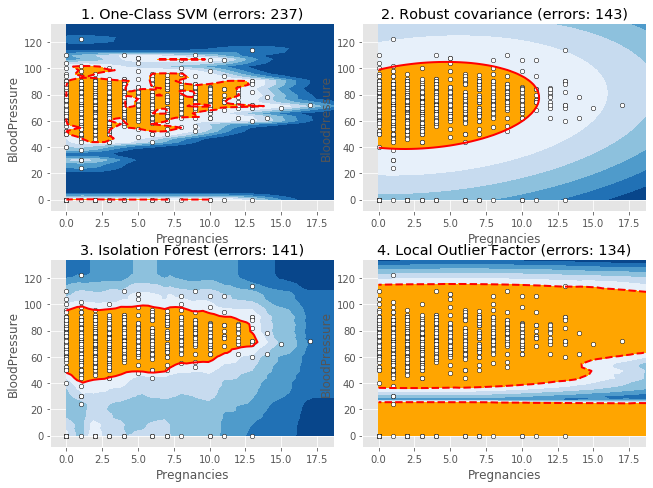

In [81]:
tt = OutLierDetection(df,'Pregnancies','BloodPressure',.1)

One-Class SVM {-1: 145, 1: 491}
Robust covariance {-1: 64, 1: 572}
Isolation Forest {-1: 64, 1: 572}
Local Outlier Factor {-1: 64, 1: 572}


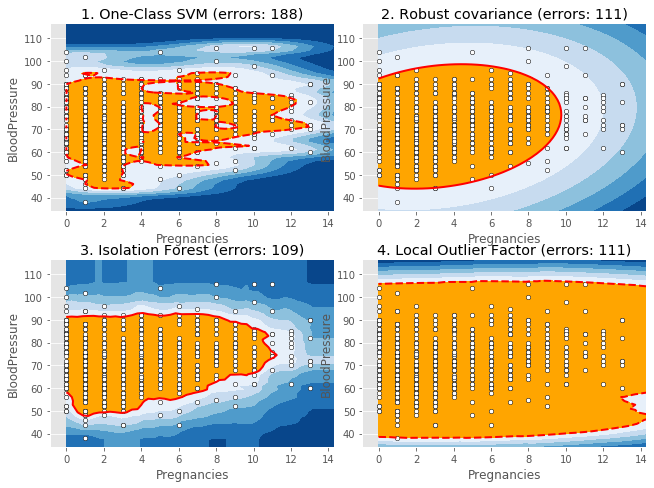

In [82]:
tt_t = OutLierDetection(df_clean,'Pregnancies','BloodPressure',.1)

### Comparing the accuracy of models after cleaning

In [83]:
df_clean_name = df_clean.columns

In [84]:
X_c = df_clean[df_clean_name[0:8]]
y_c = df_clean[df_clean_name[8]]

In [85]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size = 0.25,
                                                           random_state=0, stratify = y_c)

In [86]:
models = GetScaledModel('minmax')
names, results = BasedLine2(X_train_c, y_train_c, models)

minmaxLR: 0.775798 (0.040042)
minmaxLDA: 0.782181 (0.044073)
minmaxKNN: 0.744105 (0.062750)
minmaxCART: 0.692066 (0.079658)
minmaxNB: 0.759131 (0.047747)
minmaxSVM: 0.763298 (0.040902)
minmaxAB: 0.712899 (0.031326)
minmaxGBM: 0.754920 (0.045778)
minmaxRF: 0.765293 (0.046003)
minmaxET: 0.758998 (0.049157)


In [87]:
PlotBoxR().PlotResult(names, results)

In [88]:
scaledScoreMinMax_c = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax,
                          scaledScoreMinMax_c], axis=1)
compareModels

Model   Score         Model   Score       Model   Score       Model   Score
0    LR  0.7670    standardLR  0.7671    minmaxLR  0.7621    minmaxLR  0.7758
1   LDA  0.7654   standardLDA  0.7654   minmaxLDA  0.7654   minmaxLDA  0.7822
2   KNN  0.6906   standardKNN  0.6970   minmaxKNN  0.7116   minmaxKNN  0.7441
3  CART  0.6873  standardCART  0.7168  minmaxCART  0.6988  minmaxCART  0.6921
4    NB  0.7508    standardNB  0.7508    minmaxNB  0.7508    minmaxNB  0.7591
5   SVM  0.7476   standardSVM  0.7590   minmaxSVM  0.7590   minmaxSVM  0.7633
6    AB  0.7363    standardAB  0.7363    minmaxAB  0.7379    minmaxAB  0.7129
7   GBM  0.7671   standardGBM  0.7704   minmaxGBM  0.7687   minmaxGBM  0.7549
8    RF  0.7394    standardRF  0.7476    minmaxRF  0.7460    minmaxRF  0.7653
9    ET  0.7378    standardET  0.7248    minmaxET  0.7362    minmaxET  0.7590

## 4.3 Feature Selection

### 4.3.1 Correlation

In [89]:
def HeatMap(df,x=True):
        correlations = df.corr()
        ## Create color map ranging between two colors
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        fig, ax = plt.subplots(figsize=(10, 10))
        fig = sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=x, cbar_kws={"shrink": .75})
        fig.set_xticklabels(fig.get_xticklabels(), rotation = 90, fontsize = 10)
        fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 10)
        plt.tight_layout()
        plt.show()

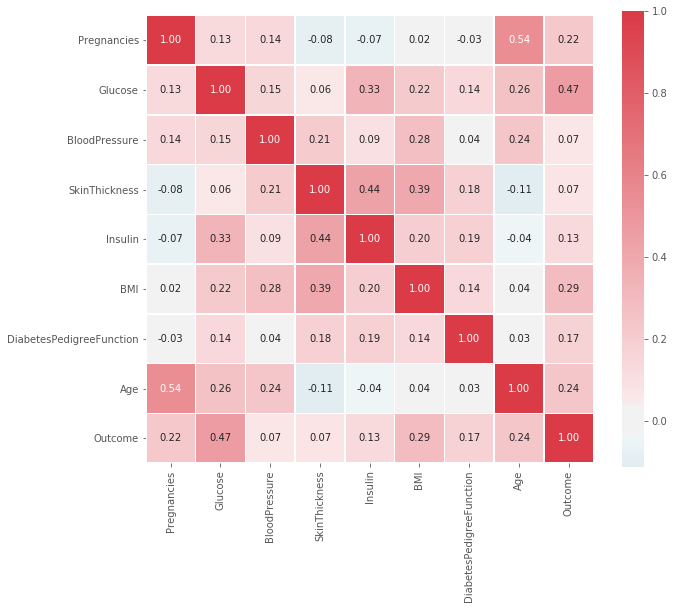

In [90]:
HeatMap(df, x = True)

- 피처간 상관도가 높은 케이스는 없다.

### 4.3.2 Feature Importance

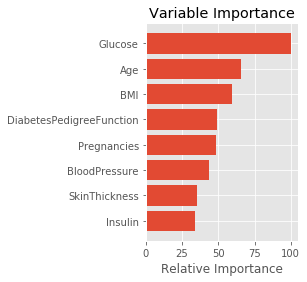

In [91]:
clf = ExtraTreesClassifier(n_estimators=250,
                              random_state=SEED)

clf.fit(X_train_c, y_train_c)

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])#boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [92]:
df_feature_imp=df_clean[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]
df_feature_imp_name = df_feature_imp.columns

In [93]:
X =  df_feature_imp[df_feature_imp_name[0:df_feature_imp.shape[1]-1]]
Y = df_feature_imp[df_feature_imp_name[df_feature_imp.shape[1]-1]]
X_train_im, X_test_im, y_train_im, y_test_im =train_test_split(X,Y,
                                                   test_size=0.1,
                                                   random_state=0,
                                                   stratify=df_feature_imp['Outcome'])

In [94]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train_im, y_train_im,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax_im = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax,
                          scaledScoreMinMax_c,
                          scaledScoreMinMax_im], axis=1)
compareModels

minmaxLR: 0.783424 (0.044573)
minmaxLDA: 0.781670 (0.043951)
minmaxKNN: 0.757108 (0.052171)
minmaxCART: 0.690563 (0.047664)
minmaxNB: 0.781730 (0.046205)
minmaxSVM: 0.790260 (0.034698)
minmaxAB: 0.755414 (0.041720)
minmaxGBM: 0.755354 (0.042918)
minmaxRF: 0.771083 (0.030910)
minmaxET: 0.769328 (0.028204)


Model   Score         Model   Score       Model   Score       Model   Score  \
0    LR  0.7670    standardLR  0.7671    minmaxLR  0.7621    minmaxLR  0.7758   
1   LDA  0.7654   standardLDA  0.7654   minmaxLDA  0.7654   minmaxLDA  0.7822   
2   KNN  0.6906   standardKNN  0.6970   minmaxKNN  0.7116   minmaxKNN  0.7441   
3  CART  0.6873  standardCART  0.7168  minmaxCART  0.6988  minmaxCART  0.6921   
4    NB  0.7508    standardNB  0.7508    minmaxNB  0.7508    minmaxNB  0.7591   
5   SVM  0.7476   standardSVM  0.7590   minmaxSVM  0.7590   minmaxSVM  0.7633   
6    AB  0.7363    standardAB  0.7363    minmaxAB  0.7379    minmaxAB  0.7129   
7   GBM  0.7671   standardGBM  0.7704   minmaxGBM  0.7687   minmaxGBM  0.7549   
8    RF  0.7394    standardRF  0.7476    minmaxRF  0.7460    minmaxRF  0.7653   
9    ET  0.7378    standardET  0.7248    minmaxET  0.7362    minmaxET  0.7590   

        Model   Score  
0    minmaxLR  0.7834  
1   minmaxLDA  0.7817  
2   minmaxKNN  0.7571  
3  minmaxCART  0.6906  
4    minmaxNB  0.7817  
5   minmaxSVM  0.7903  
6    minmaxAB  0.7554  
7   minmaxGBM  0.7554  
8    minmaxRF  0.7711  
9    minmaxET  0.7693

# 5. 알고리즘 튜닝

In [95]:
df_unscaled = df_clean[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]
df_imp_scaled_name = df_unscaled.columns

In [96]:
df_imp_scaled = MinMaxScaler().fit_transform(df_unscaled)
X =  df_imp_scaled[:,0:4]
Y =  df_imp_scaled[:,4]
X_train_sc, X_test_sc, y_train_sc, y_test_sc =train_test_split(X,Y,
                                                   test_size=0.1,
                                                   random_state=0,
                                                   stratify=df_imp_scaled[:,4])

In [97]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

In [98]:
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred

In [99]:
class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred

## 5.1 Logistic Regression

- C: 정규화 계수  
- RegularizationType : L2 or L1, Default는 L2

In [100]:
# model
model = LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2']

In [101]:
C = uniform(loc = 0, scale = 4)

In [102]:
C

In [103]:
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [104]:
hyperparameters

{'C': <scipy.stats._distn_infrastructure.rv_frozen at 0x1b4945489c8>,
 'penalty': ['l1', 'l2']}

In [105]:
LR_RandSearch = RandomSearch(X_train_sc,y_train_sc,model,hyperparameters)
# LR_best_model,LR_best_params = LR_RandSearch.RandomSearch()
Prediction_LR = LR_RandSearch.BestModelPridict(X_test_sc)

Best: 0.786903 using {'C': 3.730229437354635, 'penalty': 'l2'}


In [106]:
LR_RandSearch

In [107]:
Prediction_LR

array([0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.])

In [108]:
def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" #first cast decimal as str
    #     print(prc) #str format output is {:.3f}
        return float(prc.format(f_val))

In [109]:
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_LR).mean(),7))

prediction on test set is: 0.828125


## 5.2 KNN

In [110]:
model_KNN = KNeighborsClassifier()

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
param_grid = dict(n_neighbors=neighbors)

In [111]:
KNN_GridSearch = GridSearch(X_train_sc,y_train_sc,model_KNN,param_grid)
Prediction_KNN = KNN_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_KNN).mean(),7))

Best: 0.809558 using {'n_neighbors': 15}
prediction on test set is: 0.828125


## 5.3 SVC

- C : The Penalty parameter C of the error term.  
- Kernel : Kernel type could be linear, poly, rbf or sigmoid

In [112]:
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]
param_grid = dict(C=c_values, kernel=kernel_values)
model_SVC = SVC()

In [113]:
SVC_GridSearch = GridSearch(X_train_sc,y_train_sc,model_SVC,param_grid)
Prediction_SVC = SVC_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_SVC).mean(),7))

Best: 0.792075 using {'C': 0.1, 'kernel': 'poly'}
prediction on test set is: 0.84375


## 5.4 Decision Tree

In [114]:
from scipy.stats import randint
max_depth_value = [3, None]
max_features_value =  randint(1, 4)
min_samples_leaf_value = randint(1, 4)
criterion_value = ["gini", "entropy"]

In [115]:
param_grid = dict(max_depth = max_depth_value,
                  max_features = max_features_value,
                  min_samples_leaf = min_samples_leaf_value,
                  criterion = criterion_value)

In [116]:
model_CART = DecisionTreeClassifier()
CART_RandSearch = RandomSearch(X_train_sc,y_train_sc,model_CART,param_grid)
Prediction_CART = CART_RandSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_CART).mean(),7))

Best: 0.764035 using {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 2}
prediction on test set is: 0.765625


## 5.5 AdaBoost

In [117]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

In [118]:
model_Ad = AdaBoostClassifier()
Ad_GridSearch = GridSearch(X_train_sc,y_train_sc,model_Ad,param_grid)
Prediction_Ad = Ad_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_Ad).mean(),7))

Best: 0.800817 using {'learning_rate': 0.05, 'n_estimators': 150}
prediction on test set is: 0.8125


## 5.6 Gradient Boosting

In [119]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

In [120]:
model_GB = GradientBoostingClassifier()
GB_GridSearch = GridSearch(X_train_sc,y_train_sc,model_GB,param_grid)
Prediction_GB = GB_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_GB).mean(),7))

Best: 0.774622 using {'learning_rate': 0.01, 'n_estimators': 200}
prediction on test set is: 0.828125


# 6. Ensemble models

## 6.1 Voting Ensemble

보팅은 여러 예측모델을 조합하는 간단한 방법이다. 이 방법은 두개 이상의 단일 모델을 생성하는 것부터 시작된다. 이 후 voting classifier를 사용하여 각 모델을 래핑하고 각 하위모델의 평균을 출력으로 내보낸다.

In [121]:
from sklearn.ensemble import VotingClassifier

In [125]:
param = {'C': 0.7678243129497218, 'penalty': 'l2'}
model1 = LogisticRegression(**param)

param = {'n_neighbors': 15}
model2 = KNeighborsClassifier(**param)

param = {'C': 1.7, 'kernel': 'linear'}
model3 = SVC(**param)

param = {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3}
model4 = DecisionTreeClassifier(**param)

param = {'learning_rate': 0.05, 'n_estimators': 150}
model5 = AdaBoostClassifier(**param)

param = {'learning_rate': 0.01, 'n_estimators': 100}
model6 = GradientBoostingClassifier(**param)

model7 = GaussianNB()

model8 = RandomForestClassifier()

model9 = ExtraTreesClassifier()

In [126]:
# create the sub models
estimators = [('LR',model1), ('KNN',model2), ('SVC',model3),
              ('DT',model4), ('ADa',model5), ('GB',model6),
              ('NB',model7), ('RF',model8),  ('ET',model9)]

In [127]:
# create the ensemble model
kfold = StratifiedKFold(n_splits=10, random_state=SEED)
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_train_sc,y_train_sc, cv=kfold)
print('Accuracy on train: ',results.mean())
ensemble_model = ensemble.fit(X_train_sc,y_train_sc)
pred = ensemble_model.predict(X_test_sc)
print('Accuracy on test:' , (y_test_sc == pred).mean())

Accuracy on train:  0.802692075015124
Accuracy on test: 0.828125
